In [2]:
import warnings
warnings.simplefilter('ignore')
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

In [4]:
path_to_file = "./kor.txt"

In [12]:
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')

In [5]:
def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())

    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)

    w = re.sub(r"[^a-zA-Z가-힣?.!,¿]+", " ", w)
    w = w.strip()

    w = '<start> ' + w + ' <end>'
    return w

In [1]:
def preprocess_sentence_kr(w):
    w = w.strip()


    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    
    w = re.sub(r'[ |ㄱ-ㅎ|ㅏ-ㅣ]+', " ", w)
    w = w.strip()

    w = '<start> ' + w + ' <end>'
    return w

In [6]:
import pandas as pd
data = pd.read_csv('kor.txt', delimiter = "\t")
data.columns = ["en", "kor", "cc"]
data

,en,kor,cc
0,Hi.,안녕.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
1,Run!,뛰어!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
2,Run.,뛰어.,CC-BY 2.0 (France) Attribution: tatoeba.org #4...
3,Who?,누구?,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
4,Wow!,우와!,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
...,...,...,...
3847,Science fiction has undoubtedly been the inspi...,공상 과학 소설은 의심의 여지 없이 오늘날 존재하는 많은 기술에 영감을 주었어.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...
3848,I started a new blog. I'll do my best not to b...,난 블로그를 시작했어. 블로그를 초반에만 반짝 많이 하다가 관두는 사람처럼은 되지 ...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
3849,I think it's a shame that some foreign languag...,몇몇 외국어 선생님이 한 번도 원어민과 공부해본 적도 없으면서 대학을 나올 수 있었...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
3850,If someone who doesn't know your background sa...,만일 네 사정도 잘 모르는 사람이 원어민 같다고 말한다면 그건 그 사람이 네가 원어...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...


In [8]:
def create_dataset(path, num_examples):
    data = pd.read_csv('kor.txt', delimiter = "\t")
    data.columns = ["en", "kor", "cc"]
    en = [preprocess_sentence(l) for l in data['en']]
    kr = [preprocess_sentence_kr(l) for l in data['kor']]


    return en, kr # kr -> eng

In [13]:
targ_lang, inp_lang = create_dataset(path_to_file, None)

In [14]:
def max_length(tensor):
    return max(len(t) for t in tensor)

In [15]:
def tokenize(lang):
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
      filters='')
    lang_tokenizer.fit_on_texts(lang)

    tensor = lang_tokenizer.texts_to_sequences(lang)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')

    return tensor, lang_tokenizer

In [18]:
def load_dataset(path, num_examples=None):
    # creating cleaned input, output pairs
    targ_lang, inp_lang = create_dataset(path, num_examples)

    input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
    target_tensor, targ_lang_tokenizer = tokenize(targ_lang)
    print(input_tensor)
    return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [19]:
num_examples = 15000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file, num_examples)

# calculate target tensor's max length 
max_length_targ, max_length_inp = max_length(target_tensor), max_length(input_tensor)

[[   1  532    3 ...    0    0    0]
 [   1  533   18 ...    0    0    0]
 [   1  533    3 ...    0    0    0]
 ...
 [   1  592 5801 ...    0    0    0]
 [   1 1796   43 ...    0    0    0]
 [   1 1793 1794 ...   19    3    2]]


In [20]:
# valdation 20%
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

3081 3081 771 771


In [21]:
def convert(lang, tensor):
    for t in tensor:
        if t!=0:
            print ("%d ----> %s" % (t, lang.index_word[t]))

In [42]:
print ("input language; index to word mapping")
convert(inp_lang, input_tensor_train[0])
print ()
print ("target language; index to word mapping")
convert(targ_lang, target_tensor_train[0])

input language; index to word mapping
1 ----> <start>
9 ----> 나는
994 ----> 이름을
4401 ----> 외우는
128 ----> 게
1643 ----> 힘들어
3 ----> .
2 ----> <end>

target language; index to word mapping
1 ----> <start>
4 ----> i
25 ----> have
11 ----> a
97 ----> hard
68 ----> time
1294 ----> remembering
2093 ----> names
3 ----> .
2 ----> <end>


In [23]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 256
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [24]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 97]), TensorShape([64, 112]))

In [25]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')

    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state

    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

In [26]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 97, 256)
Encoder Hidden state shape: (batch size, units) (64, 256)


In [27]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # 이를 통해 점수를 계산합니다.
        hidden_with_time_axis = tf.expand_dims(query, 1)

        # score shape == (batch_size, max_length, 1)
        # 스코어에 self.V를 사용하기 때문에 마지막 축에 1이 들어갑니다.
        # self.V를 사용하기 전의 텐서의 형태는 (batch_size, max_length, units)입니다.
        score = self.V(tf.nn.tanh(
            self.W1(values) + self.W2(hidden_with_time_axis)))

        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(score, axis=1)

        # 합쳐서 나온 context_vector shape == (batch_size, hidden_size)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

In [28]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 256)
Attention weights shape: (batch_size, sequence_length, 1) (64, 97, 1)


In [29]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, hidden, enc_output):
        # enc_output shape == (batch_size, max_length, hidden_size)
        context_vector, attention_weights = self.attention(hidden, enc_output)

        x = self.embedding(x)

        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        # passing the concatenated vector to the GRU
        output, state = self.gru(x)

        # output shape == (batch_size * 1, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))

        # output shape == (batch_size, vocab)
        x = self.fc(output)

        return x, state, attention_weights

In [30]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 2557)


In [31]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [32]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [33]:
def train_step(inp, targ, enc_hidden):
    loss = 0

    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)

        dec_hidden = enc_hidden

        dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)


        for t in range(1, targ.shape[1]):
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

            loss += loss_function(targ[:, t], predictions)

            # teacher forcing
            dec_input = tf.expand_dims(targ[:, t], 1)

    batch_loss = (loss / int(targ.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    return batch_loss

In [34]:
EPOCHS = 5

for epoch in range(EPOCHS):
    start = time.time()

    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss

        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)

    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.5222
Epoch 1 Loss 0.4131
Time taken for 1 epoch 331.8143937587738 sec

Epoch 2 Batch 0 Loss 0.3547
Epoch 2 Loss 0.3484
Time taken for 1 epoch 338.7602758407593 sec

Epoch 3 Batch 0 Loss 0.3489
Epoch 3 Loss 0.3259
Time taken for 1 epoch 347.57763671875 sec

Epoch 4 Batch 0 Loss 0.3172
Epoch 4 Loss 0.3105
Time taken for 1 epoch 344.12548661231995 sec

Epoch 5 Batch 0 Loss 0.3204
Epoch 5 Loss 0.2989
Time taken for 1 epoch 346.0755217075348 sec



In [35]:
def evaluate(sentence):
    attention_plot = np.zeros((max_length_targ, max_length_inp))

    sentence = preprocess_sentence_kr(sentence) 

    inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
    inputs = tf.convert_to_tensor(inputs)

    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        # storing the attention weights to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += targ_lang.index_word[predicted_id] + ' '

        if targ_lang.index_word[predicted_id] == '<end>':
            return result, sentence, attention_plot

        # 예측된 ID는 모델에 다시 입력됩니다
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

In [36]:
# 어텐션 가중치를 그리기 위한 함수입니다.
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [37]:
def translate(sentence):
    result, sentence, attention_plot = evaluate(sentence)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [38]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

Input: <start> 너는 눈을 왜 그렇게 <end>
Predicted translation: i m is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is is 


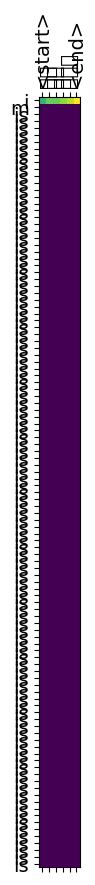

In [43]:
# 잘못된 부분 확인해보기... 

translate(u'너는 눈을 왜 그렇게')